In [7]:
import numpy as np

In [106]:
def normalize(x):
    return (x - x.min(axis=0)) / x.ptp(axis=0)

In [107]:
def standardize(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)

In [108]:
# Dataset
data = np.array([[10,95,-34,4,56], [1,2,3,4,5], [-99,7,8,9,10]])

In [109]:
# Normalize columns of numpy array
normalized = normalize(data)
print(normalized)

[[1.         1.         0.         0.         1.        ]
 [0.91743119 0.         0.88095238 0.         0.        ]
 [0.         0.05376344 1.         1.         0.09803922]]


In [97]:
# Standardize columns of numpy array
standardized = standardize(data)
print(standardized)

[[ 0.7962438   1.41259755 -1.40579187 -0.70710678  1.40861062]
 [ 0.61405242 -0.76483182  0.56943468 -0.70710678 -0.8132185 ]
 [-1.41029622 -0.64776573  0.83635719  1.41421356 -0.59539212]]


In [112]:
# Feature extraction - PCA (Week 3 lab will get code)
# Define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = np.mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [175]:
import csv

# Do csv logic manually...
def open_csv(filename):
    with open(filename, 'r') as f:
        data = list(csv.reader(f, delimiter=","))
    data = np.array(data)
    
    print("-" * 30)
    print(f"{data.size} row(s) loaded successfully")
    
    num_missing = get_num_missing_values(data)
    print(f"{num_missing} missing values found")
    print("-" * 30)
    
    return data

In [176]:
# Mushroom data - '?' for missing value
def get_num_missing_values(data, missing_char='?'):
    bools = data[np.isin(data, missing_char)]
    return len(bools)

In [195]:
# Returns total occurences (from all rows) of a search value in a certain column
def get_row_count(data, col, val):
    return len(data[data[:,col] == val])

In [210]:
# Prints n number of rows in data (numpy array)
def head(data, n=3):
    print(data[:n])

In [258]:
data_filepath = './Mushroom/agaricus-lepiota.data'
data = open_csv(data_filepath)

# Get total number of edible mushrooms
num_edible = get_row_count(data, 0, 'e')
print(f"{num_edible} edible mushrooms")

# Get total number of poisonous mushrooms
num_poisonous = get_row_count(data, 0, 'p')
print(f"{num_poisonous} poisonous mushrooms")

head(data)

------------------------------
186852 row(s) loaded successfully
2480 missing values found
------------------------------
4208 edible mushrooms
3916 poisonous mushrooms
[['p' 'x' 's' 'n' 't' 'p' 'f' 'c' 'n' 'k' 'e' 'e' 's' 's' 'w' 'w' 'p' 'w'
  'o' 'p' 'k' 's' 'u']
 ['e' 'x' 's' 'y' 't' 'a' 'f' 'c' 'b' 'k' 'e' 'c' 's' 's' 'w' 'w' 'p' 'w'
  'o' 'p' 'n' 'n' 'g']
 ['e' 'b' 's' 'w' 't' 'l' 'f' 'c' 'b' 'n' 'e' 'c' 's' 's' 'w' 'w' 'p' 'w'
  'o' 'p' 'n' 'n' 'm']]


In [202]:
import matplotlib.pyplot as plt

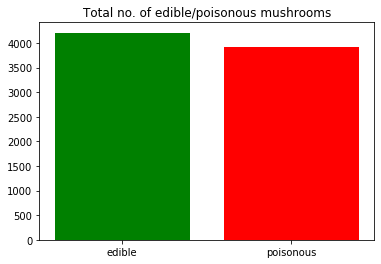

In [208]:
plt.bar(['edible', 'poisonous'], [num_edible, num_poisonous], color=['green', 'red'])
plt.title('Total no. of edible/poisonous mushrooms')
plt.show()

In [219]:
# Column names
columns = [
    'class',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat',
]

In [318]:
# 'Pretty print' a numpy array as a table with column names (from-to column exclusive)
def p_print(data, columns, from_col=0, to_col=len(columns)):
    sub_cols = columns[from_col:to_col]

    data = np.vstack([sub_cols, data[:, from_col:to_col]])
    s = [[str(e) for e in row] for row in data]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))

In [319]:
p_print(data, columns, 0, 5)

class	cap-shape	cap-surface	cap-color	bruises?
p    	x        	s          	n        	t       
e    	x        	s          	y        	t       
e    	b        	s          	w        	t       
p    	x        	y          	w        	t       
e    	x        	s          	g        	f       
e    	x        	y          	y        	t       
e    	b        	s          	w        	t       
e    	b        	y          	w        	t       
p    	x        	y          	w        	t       
e    	b        	s          	y        	t       
e    	x        	y          	y        	t       
e    	x        	y          	y        	t       
e    	b        	s          	y        	t       
p    	x        	y          	w        	t       
e    	x        	f          	n        	f       
e    	s        	f          	g        	f       
e    	f        	f          	w        	f       
p    	x        	s          	n        	t       
p    	x        	y          	w        	t       
p    	x        	s          	n        	t       
e    	b      